In [288]:
import pandas as pd

###### 1. Import untidy dataset into python

In [309]:
df=pd.read_csv("https://raw.githubusercontent.com/austin1018/-IS362_Project2/main/Tuition%20fee%20by%20state.csv",header=2)

###### 2. Rename the first column to "State"

In [290]:
df.rename(columns = {'In 2017 Dollars': 'State'},inplace=True)

###### 3. Take our the unnecessary columns

In [310]:
df = df[df.columns.drop(list(df.filter(regex='Change')))]

In [311]:
df.head()

,In 2017 Dollars,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,...,2008-09.1,2009-10.1,2010-11.1,2011-12.1,2012-13.1,2013-14.1,2014-15.1,2015-16.1,2016-17.1,2017-18.1
0,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$5,206","$5,595","$5,907","$5,910","$6,181","$6,167","$6,307","$6,876","$7,250","$7,438"
1,Alabama,"$3,526","$3,420","$3,351","$3,301","$3,155","$3,227","$3,837","$4,345","$4,368",...,"$6,641","$7,374","$8,279","$8,669","$9,332","$9,599","$9,740","$9,996","$10,256","$10,530"
2,Arkansas,"$2,422","$2,480","$2,520","$2,513","$2,555","$2,703","$2,835","$2,885","$2,985",...,"$6,581","$6,797","$7,078","$7,210","$7,474","$7,599","$7,802","$8,085","$8,396","$8,553"
3,Arizona,"$1,800","$1,907","$1,997","$1,981","$2,026","$2,180","$2,222","$2,331","$2,355",...,"$6,214","$7,450","$9,067","$10,223","$10,394","$10,561","$10,681","$10,907","$11,119","$11,218"
4,California,"$1,044","$1,015",$871,$744,$706,$929,$920,"$1,212","$1,516",...,"$6,049","$7,445","$8,404","$9,679","$9,601","$9,512","$9,423","$9,505","$9,462","$9,680"


###### 4. Divide the main data frame collegeTuitionDF into two separate data frames 

In [294]:
collegeDistrictTuitionDF=df.iloc[:, 0:14]
mapping = {collegeDistrictTuitionDF.columns[4]: '2007-08'}
collegeDistrictTuitionDF = collegeDistrictTuitionDF.rename(columns=mapping)

In [295]:
collegeStateTuitionDF=df.iloc[:, [0,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]

###### 5. Fix the colomn name issue 

In [296]:
collegeStateTuitionDF.rename(columns = {'2004-05.1': '2004-05'
                                        ,'2005-06.1': '2005-06'
                                        ,'2006-07.1': '2006-07'
                                        ,'2007-08.1': '2007-08'                                        
                                        ,'2008-09.1': '2008-09'
                                        ,'2009-10.1': '2009-10'
                                        ,'2010-11.1': '2010-11'
                                        ,'2011-12.1': '2011-12'
                                        ,'2012-13.1': '2012-13'
                                        ,'2013-14.1': '2013-14'
                                        ,'2014-15.1': '2014-15'
                                        ,'2015-16.1': '2015-16'
                                        ,'2016-17.1': '2016-17'
                                        ,'2017-18.1': '2017-18'
                                       },inplace=True)

C:\Users\qwu\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [297]:
mapping = {collegeStateTuitionDF.columns[4]: '2007-08'}
collegeStateTuitionDF = collegeStateTuitionDF.rename(columns=mapping)

###### 6. Unpivot both tables

In [299]:
cdf=collegeDistrictTuitionDF.melt(id_vars='State',var_name='college_year',value_name='In-District 2 Yr. Tuition Fee')

In [300]:
csf=collegeStateTuitionDF.melt(id_vars='State',var_name='college_year',value_name='In-State 4 Yr. Tuition Fee')

In [301]:
csf

,State,college_year,In-State 4 Yr. Tuition Fee
0,Alaska,2004-05,"$4,439"
1,Alabama,2004-05,"$5,829"
2,Arkansas,2004-05,"$5,921"
3,Arizona,2004-05,"$5,271"
4,California,2004-05,"$5,422"
...,...,...,...
723,Vermont,2017-18,"$16,043"
724,Washington,2017-18,"$9,480"
725,Wisconsin,2017-18,"$8,962"
726,West Virginia,2017-18,"$7,887"


###### 7. Merge both datasets into one and tidy up the tuition fee data.
This is one feature that was not covered in the course. Merging dataset is very useful when we want to combine the information to do the further analysis.

In [302]:
finalDF=pd.merge(cdf,csf,on=['State','college_year'],how='outer').fillna(0)

In [303]:
finalDF["In-District 2 Yr. Tuition Fee"]=finalDF["In-District 2 Yr. Tuition Fee"].str.replace('$', '').str.replace(',', '').fillna(0).astype(int)

<ipython-input-303-d7535f68ddc4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  finalDF["In-District 2 Yr. Tuition Fee"]=finalDF["In-District 2 Yr. Tuition Fee"].str.replace('$', '').str.replace(',', '').fillna(0).astype(int)


In [304]:
finalDF["In-State 4 Yr. Tuition Fee"]=finalDF["In-State 4 Yr. Tuition Fee"].str.replace('$', '').str.replace(',', '').fillna(0).astype(int)

<ipython-input-304-ea0e2e0a64de>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  finalDF["In-State 4 Yr. Tuition Fee"]=finalDF["In-State 4 Yr. Tuition Fee"].str.replace('$', '').str.replace(',', '').fillna(0).astype(int)


In [305]:
finalDF.head(20)

,State,college_year,In-District 2 Yr. Tuition Fee,In-State 4 Yr. Tuition Fee
0,Alaska,2004-05,0,4439
1,Alabama,2004-05,3526,5829
2,Arkansas,2004-05,2422,5921
3,Arizona,2004-05,1800,5271
4,California,2004-05,1044,5422
5,Colorado,2004-05,2867,4825
6,Connecticut,2004-05,3110,8189
7,District of Columbia,2004-05,0,3257
8,Delaware,2004-05,3242,8568
9,Florida,2004-05,2301,3947


###### 8. Aggregate the data by college_year and create the bar chart to present the analysis.

In [306]:
DF_Agg=finalDF.groupby(["college_year"]).mean()

In [307]:
DF_Agg

,In-District 2 Yr. Tuition Fee,In-State 4 Yr. Tuition Fee
college_year,,
2004-05,2875.923077,6413.173077
2005-06,2951.057692,6657.365385
2006-07,2956.596154,6823.326923
2007-08,3013.961538,7114.096154
2008-09,2993.519231,7178.807692
2009-10,3226.788462,7813.807692
2010-11,3371.884615,8321.865385
2011-12,3478.250000,8621.942308
2012-13,3604.442308,8925.942308


<AxesSubplot:xlabel='college_year'>

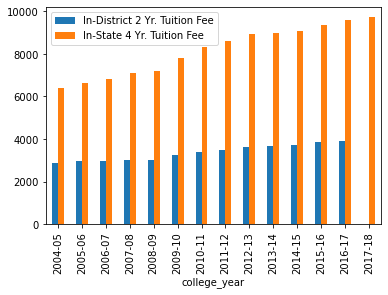

In [308]:
DF_Agg.plot.bar()

# Conclusion
By looking at above chart, it is clear that the In-State 4 year tuition fee grows much faster than the In-District 2 year tuition fee. In order to support students on the college expense, the state need to invest more money on the 4 years college. 